In [3]:
import matplotlib.pyplot as plt
import numpy as np
import midii
import copy
from pathlib import Path

In [5]:
mid = midii.MidiFile(
    midii.sample.dataset[0], convert_1_to_0=True, lyric_encoding="cp949"
)
mid_q8 = copy.deepcopy(mid)
mid_q16 = copy.deepcopy(mid)
mid_q32 = copy.deepcopy(mid)
mid_q8.quantize(unit="8")
mid_q16.quantize(unit="16")
mid_q32.quantize(unit="32")

In [6]:
def get_durations(notes):
    return [n['duration'] for n in notes]

durations_orig = get_durations(mid.to_json())
durations_q8 = get_durations(mid_q8.to_json())
durations_q16 = get_durations(mid_q8.to_json())
durations_q32 = get_durations(mid_q8.to_json())

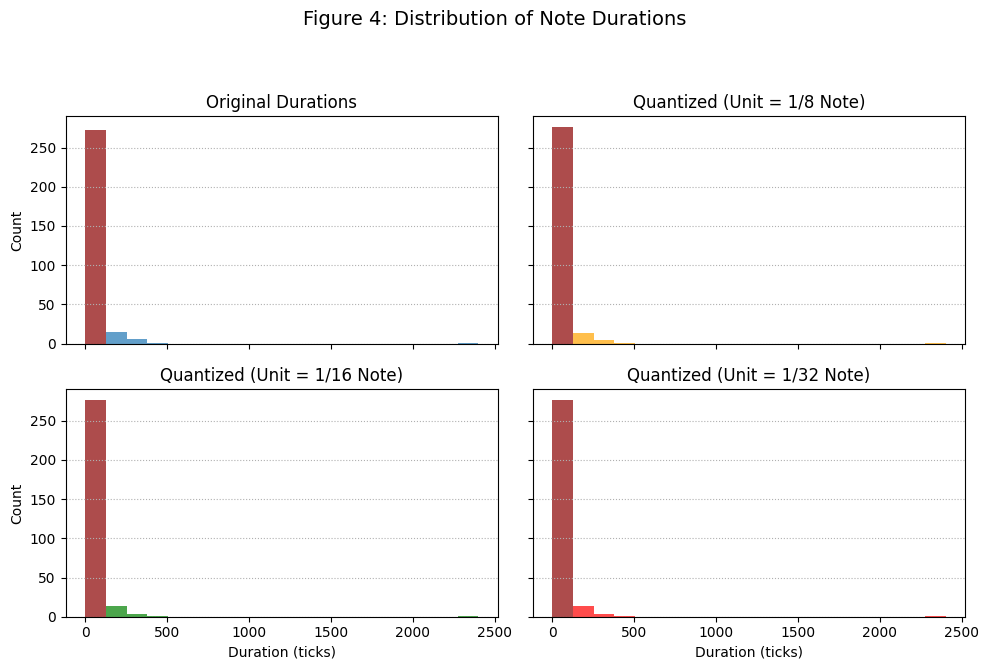

In [7]:
# Create Figure 4
fig4, axs4 = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
fig4.suptitle('Figure 4: Distribution of Note Durations', fontsize=14)

max_dur = max(durations_orig) if durations_orig else TPQN
bins = np.linspace(0, max_dur, 20) # Adjust binning as needed

axs4[0, 0].hist(durations_orig, bins=bins, alpha=0.7)
axs4[0, 0].set_title("Original Durations")
axs4[0, 0].set_ylabel("Count")

axs4[0, 1].hist(durations_q8, bins=bins, alpha=0.7, color='orange')
axs4[0, 1].set_title("Quantized (Unit = 1/8 Note)")

axs4[1, 0].hist(durations_q16, bins=bins, alpha=0.7, color='green')
axs4[1, 0].set_title("Quantized (Unit = 1/16 Note)")
axs4[1, 0].set_xlabel("Duration (ticks)")
axs4[1, 0].set_ylabel("Count")

axs4[1, 1].hist(durations_q32, bins=bins, alpha=0.7, color='red')
axs4[1, 1].set_title("Quantized (Unit = 1/32 Note)")
axs4[1, 1].set_xlabel("Duration (ticks)")

# Highlight the first bin potentially containing zero/short notes
for ax_row in axs4:
    for ax in ax_row:
        ax.patches[0].set_fc('darkred') # Color the first bin
        ax.grid(axis='y', linestyle=':')


plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show() # Use plt.savefig('figure4.png') for paper